<span style="font-size:30px">What are the most demanded skills for the top 3 most popular data roles?</span>


In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
job_place = 'United Kingdom'
# Create new dataframe of just United Kingdom Jobs
df_uk = df[df['job_country'] == job_place]
# Expand rows in 'df_uk' for each skill in the 'job_skills' list, creating one row per skill.
df_skills = df_uk.explode('job_skills')
# Group the DataFrame by 'job_skills' and 'job_title_short', count the occurrences,
# reset the index to create a new DataFrame with a 'skills_count' column,
# and sort the DataFrame in descending order by 'skills_count'
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)

In [3]:
# Extract unique job titles from 'job_title_short', convert to a list,
# take the first three titles, sort them alphabetically, and store in 'job_titles'
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [4]:
# Calculate the total number of occurrences for each 'job_title_short' and store it as 'jobs_total'.
# Merge the skill counts with the job title totals into a new DataFrame.
# Compute the percentage of each skill ('skill_perc') relative to the total occurrences of its job title.
df_job_title_count = df_uk['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_perc'] = 100 * (df_skills_perc['skills_count'] / df_skills_perc['jobs_total'])

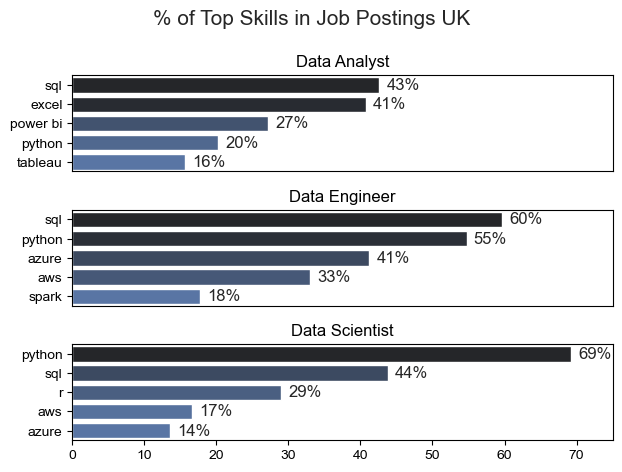

In [5]:
# Create subplots to visualize the top 5 skills for each job title in 'job_titles'.
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')
# For each job title:
# - Filter the top 5 skills by percentage ('skill_perc') for the job title.
# - Plot a horizontal bar chart with skill percentages on the x-axis and skill names on the y-axis.
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skill_perc', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 75)
    # - Add the job title as the subplot's title and annotate bars with percentage values.
    for y, x in enumerate(df_plot['skill_perc']):
        ax[i].text(x + 1, y, f'{x:.0f}%', va='center')
    # - Hide x-axis ticks for all but the last subplot and set consistent x-axis limits.
    if i != len(job_titles) -1:
        ax[i].set_xticks([])
# Customize the overall appearance with Seaborn and set a global title for the figure.
fig.suptitle('% of Top Skills in Job Postings UK', fontsize=15)
fig.tight_layout()
plt.show()
